In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from astropy.io import fits 
from astropy.cosmology import FlatLambdaCDM

path = '/Users/connor_auge/Research/Disertation/catalogs/' # Path for photometry catalogs

In [45]:
def flux_to_lum(F,z,wave=np.nan):
    '''Function to convert flux to luminosity'''
    cosmo = FlatLambdaCDM(H0=70, Om0=0.29, Tcmb0=2.725)

    dl = cosmo.luminosity_distance(z).value  # Distance in Mpc
    dl_cgs = dl*(3.0856E24)  # Distance from Mpc to cm

    if np.isnan(wave):
        nuFnu = F
    else:
        # convert clux units from Jy to ger/s/cm^2
        wave_cgs = wave*1E-8 # obs wave from Angstroms to cm
        rest_wave_cgs = wave_cgs/(1+z)
        obs_freq = 3E10/wave_cgs
        rest_freq = 3E10/rest_wave_cgs
        F *= 1E-23
        nuFnu = obs_freq*F
        # convert flux to luminosity
    L = nuFnu*4*np.pi*dl_cgs**2

    return L


def lum_to_flux(L,z):
    '''Function to convert flux to luminosity'''
    cosmo = FlatLambdaCDM(H0=70, Om0=0.29, Tcmb0=2.725)

    dl = cosmo.luminosity_distance(z).value  # Distance in Mpc
    dl_cgs = dl*(3.0856E24)  # Distance from Mpc to cm

    # convert flux to luminosity
    F = L/(4*np.pi*dl_cgs**2)
    
    return F

In [46]:
Fx_hard_wave = 2.07 # Angstroms
Fx_full_wave = 2.36 # Angstroms

In [47]:
goodsN_auge = fits.open(path+'GOODSN_full_cat_update.fits')
goodsN_auge_data = goodsN_auge[1].data
goodsN_auge.close()

goodsS_auge = fits.open(path+'GOODSS_full_cat_update.fits')
goodsS_auge_data = goodsS_auge[1].data
goodsS_auge.close()



In [77]:
goodsN_auge_ID = goodsN_auge_data['id_xray']
goodsN_auge_phot_ID = goodsN_auge_data['id_rainbow']
goodsN_RA = goodsN_auge_data['xRA']
goodsN_DEC = goodsN_auge_data['xDec']
goodsN_auge_Lx = goodsN_auge_data['Lx']
goodsN_auge_Lx_hard = goodsN_auge_data['Lx']*0.611
goodsN_auge_z = goodsN_auge_data['z_spec']
goodsN_auge_Nh = goodsN_auge_data['Nh']
goodsN_auge_Nh_lo = goodsN_auge_data['Nh_lo']
goodsN_auge_Nh_hi = goodsN_auge_data['Nh_hi']

goodsN_auge_Fx_hard_match_mjy = goodsN_auge_data['Fx_hard']*4.136E8/(10-2)
goodsN_auge_Fx_soft_match_mjy = goodsN_auge_data['Fx_soft']*4.136E8/(2-0.5)


goodsS_auge_ID = goodsS_auge_data['id_xray']
goodsS_auge_phot_ID = goodsS_auge_data['id_rainbow']
goodsS_auge_RA = goodsS_auge_data['xRA']
goodsS_auge_DEC = goodsS_auge_data['xDEC']
goodsS_auge_Lx_obs = goodsS_auge_data['Lx']
goodsS_auge_Lx_hard_obs = goodsS_auge_data['Lx']*0.611
goodsS_auge_Lx = goodsS_auge_data['Lxc']
goodsS_auge_Lx_hard = goodsS_auge_data['Lxc']*0.611
goodsS_auge_z = goodsS_auge_data['z_spec']
goodsS_auge_Nh = goodsS_auge_data['Nh']
goodsS_auge_Nh_lo = goodsS_auge_data['Nh_lo']
goodsS_auge_Nh_hi = goodsS_auge_data['Nh_hi']

correction = goodsS_auge_Lx_obs/goodsS_auge_Lx

goodsS_Fx_full = goodsS_auge_data['Fx_full']/correction
goodsS_Fx_hard_int = goodsS_Fx_full*0.611

goodsS_auge_Fx_hard_match_mjy = goodsS_auge_data['Fx_hard']*4.136E8/(10-2)
goodsS_auge_Fx_soft_match_mjy = goodsS_auge_data['Fx_soft']*4.136E8/(2-0.5)
goodsS_auge_Fx_hard_int_match_mjy = goodsS_Fx_hard_int*4.136E8/(10-2)

/var/folders/_6/vw02nk9n7g11l58s8rrjb9k80000gn/T/ipykernel_22419/2019259836.py:29: RuntimeWarning: invalid value encountered in true_divide
  correction = goodsS_auge_Lx_obs/goodsS_auge_Lx


In [78]:
goodsS_calc_Lx_obs = flux_to_lum(goodsS_auge_Fx_hard_match_mjy/1000,goodsS_auge_z,Fx_hard_wave)
goodsS_calc_Lx_obs2 = flux_to_lum(goodsS_auge_data['Fx_hard'],goodsS_auge_z)


In [79]:
goodsS_auge_Lx_hard

array([2.739724e+44, 2.811822e+43, 2.307136e+44, ..., 0.000000e+00,
       2.451332e+41, 5.191056e+43])

/var/folders/_6/vw02nk9n7g11l58s8rrjb9k80000gn/T/ipykernel_22419/2112124440.py:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(goodsS_calc_Lx_obs2),np.log10(goodsS_auge_Lx_hard_obs),'.')
/var/folders/_6/vw02nk9n7g11l58s8rrjb9k80000gn/T/ipykernel_22419/2112124440.py:3: RuntimeWarning: invalid value encountered in log10
  plt.plot(np.log10(goodsS_calc_Lx_obs2),np.log10(goodsS_auge_Lx_hard_obs),'.')


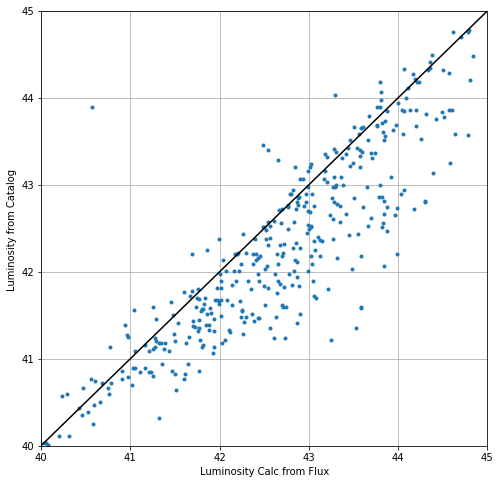

In [82]:
plt.figure(figsize=(8,8),facecolor='w')
# plt.plot(np.log10(goodsS_calc_Lx_obs),np.log10(goodsS_auge_Lx_hard_obs),'.')
plt.plot(np.log10(goodsS_calc_Lx_obs2),np.log10(goodsS_auge_Lx_hard_obs),'.')
plt.plot(np.arange(40,47),np.arange(40,47),color='k')
plt.xlabel('Luminosity Calc from Flux')
plt.ylabel('Luminosity from Catalog ')
plt.xlim(40,45)
plt.ylim(40,45)
plt.grid()
plt.show()